<a href="https://colab.research.google.com/github/KIET-2025-BATCH/KW-AID-DS-T15/blob/main/Animal_Image_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 Step 1: Install Required Libraries
Run this first in Google Colab to install the required packages.

In [ ]:
# Install YOLOv8 and TensorFlow.js
!pip install ultralytics tensorflow tensorflowjs


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 949.8/949.8 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.1/89.1 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 51.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.9/644.9 MB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 33.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 53.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 40.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 60.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 34.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 38.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8

Step 2: Import Required Libraries

In [ ]:
from ultralytics import YOLO
import torch
import os
from IPython.display import display, Image


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


Step 3: Check GPU Availability

In [ ]:
# Check if GPU is available
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f"Using device: {device}")


Using device: cpu


 Step 4: Download or Prepare Animal Detection Dataset
If you have a custom dataset for animals, upload it to Google Drive and mount it.
Alternatively, we use the COCO dataset, which contains animal images.

In [ ]:
# Download the COCO128 dataset (contains some animal images)
!yolo task=detect mode=dataset name=coco128


Traceback (most recent call last):
  File "/usr/local/bin/yolo", line 8, in <module>
    sys.exit(entrypoint())
             ^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/ultralytics/cfg/__init__.py", line 920, in entrypoint
    raise ValueError(f"Invalid 'mode={mode}'. Valid modes are {MODES}.\n{CLI_HELP_MSG}")
ValueError: Invalid 'mode=dataset'. Valid modes are frozenset({'train', 'predict', 'benchmark', 'track', 'val', 'export'}).

    Arguments received: ['yolo', 'task=detect', 'mode=dataset', 'name=coco128']. Ultralytics 'yolo' commands use the following syntax:

        yolo TASK MODE ARGS

        Where   TASK (optional) is one of frozenset({'obb', 'classify', 'detect', 'segment', 'pose'})
                MODE (required) is one of frozenset({'train', 'predict', 'benchmark', 'track', 'val', 'export'})
                ARGS (optional) are any number of custom 'arg=value' pairs like 'imgsz=320' that override defaults.
                    See all ARGS at https://docs.u

Step 5: Load YOLOv8 and Train it on Animal Dataset

In [ ]:
# Load YOLOv8 model
model = YOLO("yolov8n.pt")  # Pretrained YOLOv8 nano model

# Train the model on the dataset for 10 epochs (adjust as needed)
model.train(data="coco128.yaml", epochs=10, device=device)


100%|██████████| 6.25M/6.25M [00:00<00:00, 17.6MB/s]


Ultralytics 8.3.94 🚀 Python-3.11.11 torch-2.6.0+cu124 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=coco128.yaml, epochs=10, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=cpu, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_width=

100%|██████████| 6.66M/6.66M [00:00<00:00, 18.1MB/s]
Unzipping /content/datasets/coco128.zip to /content/datasets/coco128...: 100%|██████████| 263/263 [00:00<00:00, 2218.13file/s]

Dataset download success ✅ (2.6s), saved to /content/datasets



100%|██████████| 755k/755k [00:00<00:00, 3.22MB/s]



                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128

train: Scanning /content/datasets/coco128/labels/train2017... 126 images, 2 backgrounds, 0 corrupt: 100%|██████████| 128/128 [00:00<00:00, 733.25it/s]

train: New cache created: /content/datasets/coco128/labels/train2017.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/datasets/coco128/labels/train2017.cache... 126 images, 2 backgrounds, 0 corrupt: 100%|██████████| 128/128 [00:00<?, ?it/s]


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000119, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs/detect/train
Starting training for 10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10         0G      1.157       1.39      1.195         78        640: 100%|██████████| 8/8 [02:05<00:00, 15.67s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:42<00:00, 10.62s/it]

                   all        128        929      0.626      0.544      0.607      0.447



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10         0G      1.178      1.377      1.211        106        640: 100%|██████████| 8/8 [02:06<00:00, 15.78s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:43<00:00, 10.96s/it]

                   all        128        929      0.643      0.574      0.632      0.471



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10         0G      1.132      1.286      1.185        107        640: 100%|██████████| 8/8 [01:53<00:00, 14.23s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:37<00:00,  9.35s/it]

                   all        128        929      0.638      0.599      0.642       0.48



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10         0G      1.151      1.269      1.205         93        640: 100%|██████████| 8/8 [01:48<00:00, 13.54s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:37<00:00,  9.48s/it]

                   all        128        929      0.665      0.594      0.654      0.493



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10         0G      1.111      1.256      1.175         52        640: 100%|██████████| 8/8 [01:49<00:00, 13.63s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:38<00:00,  9.73s/it]

                   all        128        929      0.683      0.617      0.671      0.506



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10         0G      1.113      1.196      1.188        102        640: 100%|██████████| 8/8 [01:53<00:00, 14.20s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:40<00:00, 10.02s/it]

                   all        128        929      0.681      0.632      0.679      0.512



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10         0G      1.092       1.15      1.173        188        640: 100%|██████████| 8/8 [01:50<00:00, 13.81s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:40<00:00, 10.10s/it]

                   all        128        929      0.683      0.639      0.685      0.522



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10         0G      1.093      1.161      1.149        141        640: 100%|██████████| 8/8 [01:49<00:00, 13.71s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:36<00:00,  9.22s/it]

                   all        128        929      0.685      0.638       0.69      0.526



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10         0G      1.115      1.111      1.182        104        640: 100%|██████████| 8/8 [01:50<00:00, 13.86s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:42<00:00, 10.53s/it]

                   all        128        929      0.737      0.612      0.697      0.531



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10         0G      1.058      1.111       1.15        107        640: 100%|██████████| 8/8 [01:50<00:00, 13.80s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:40<00:00, 10.06s/it]

                   all        128        929      0.746       0.61      0.699      0.532



10 epochs completed in 0.431 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.5MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.5MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.94 🚀 Python-3.11.11 torch-2.6.0+cu124 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 72 layers, 3,151,904 parameters, 0 gradients, 8.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:30<00:00,  7.68s/it]


                   all        128        929      0.726      0.619      0.699      0.532
                person         61        254       0.84      0.662      0.779      0.568
               bicycle          3          6          1      0.331      0.356      0.316
                   car         12         46      0.668      0.218      0.325      0.198
            motorcycle          4          5      0.686      0.879      0.938      0.753
              airplane          5          6      0.854       0.98      0.972       0.85
                   bus          5          7      0.843      0.714      0.723      0.665
                 train          3          3       0.83          1      0.995      0.907
                 truck          5         12      0.821        0.5      0.533      0.361
                  boat          2          6      0.701      0.333      0.619      0.397
         traffic light          4         14      0.473      0.143      0.179       0.14
             stop sig

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 11, 13, 14, 15, 16, 17, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 38, 39, 40, 41, 42, 43, 44, 45, 46, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 67, 68, 69, 71, 72, 73, 74, 75, 76, 77, 79])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7ea6976c5250>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,

Step 6: Evaluate Model Accuracy

In [ ]:
# Evaluate the model on validation set
metrics = model.val()
print("Validation Metrics:", metrics)


Ultralytics 8.3.94 🚀 Python-3.11.11 torch-2.6.0+cu124 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 72 layers, 3,151,904 parameters, 0 gradients, 8.7 GFLOPs


val: Scanning /content/datasets/coco128/labels/train2017.cache... 126 images, 2 backgrounds, 0 corrupt: 100%|██████████| 128/128 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:27<00:00,  3.47s/it]


                   all        128        929      0.775      0.602      0.698      0.532
                person         61        254      0.866      0.638      0.782      0.568
               bicycle          3          6          1      0.321      0.361      0.322
                   car         12         46      0.754      0.217      0.319      0.195
            motorcycle          4          5      0.678      0.849      0.938      0.753
              airplane          5          6      0.847      0.932      0.972       0.85
                   bus          5          7      0.832      0.571      0.699      0.644
                 train          3          3      0.852          1      0.995      0.907
                 truck          5         12          1      0.491      0.543      0.368
                  boat          2          6      0.643      0.333      0.552      0.353
         traffic light          4         14      0.499      0.143      0.184      0.141
             stop sig

Step 7: Test Prediction on Sample Animal Image

Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2025-3-23 Python-3.11.11 torch-2.6.0+cu124 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


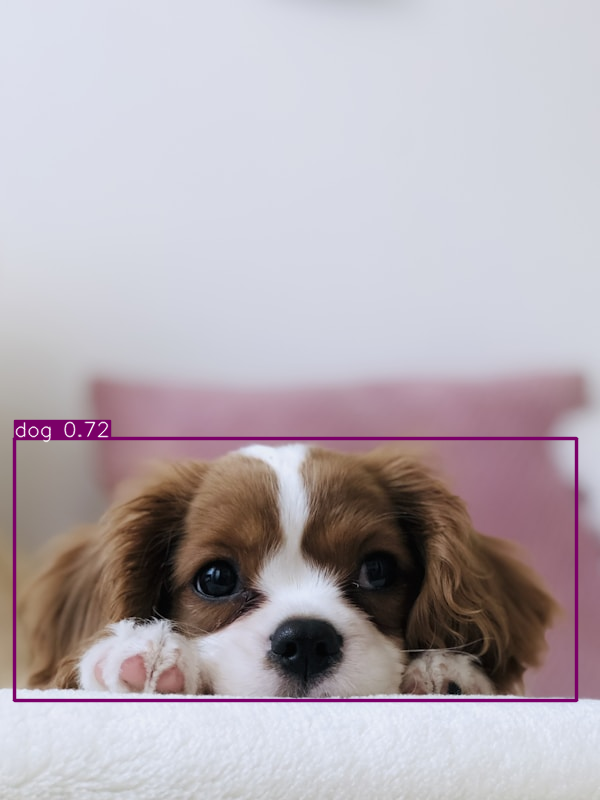

Saved 1 image to runs/detect/exp2


In [ ]:
import torch
from PIL import Image
import requests
from io import BytesIO

# Load the YOLO model (if using YOLOv5)
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

# Define image URL
image_url = "https://images.unsplash.com/photo-1560807707-8cc77767d783?w=1200&h=800&fm=jpg"

# Fetch the image from the URL
response = requests.get(image_url)
img = Image.open(BytesIO(response.content))

# Run the model on the image
results = model(img)

# Show the results
results.show()  # Displays the image with detections
results.save("output.jpg")  # Saves the processed image


In [ ]:
import torch
from PIL import Image
import requests
from io import BytesIO

# Load the YOLO model
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

# Define the image URL
image_url = "https://images.unsplash.com/photo-1560807707-8cc77767d783?w=1200&h=800&fm=jpg"

# Fetch the image from URL
response = requests.get(image_url)
img = Image.open(BytesIO(response.content))

# Run inference with filtering to detect only animals
results = model(img, classes=[15, 16, 17, 18, 19, 20, 21])  # Only detect animal classes

# Show results
results.show()  # Display detected animals


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2025-3-23 Python-3.11.11 torch-2.6.0+cu124 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


TypeError: AutoShape.forward() got an unexpected keyword argument 'classes'